In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Data/height-weight.csv')
df.head(5)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [7]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

- Here the weight is the independent feature and the height is the dependent feature or the target feature

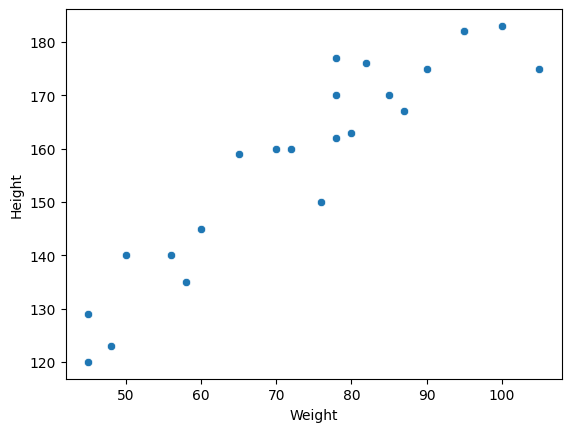

In [12]:
sns.scatterplot(x='Weight',y='Height',data=df)
plt.xlabel('Weight')
_=plt.ylabel('Height')

- Here the weight is directly proportional to the Height we can see +ve correlation between them

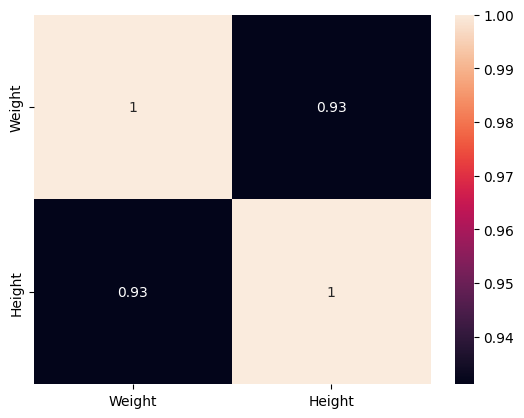

In [11]:
# plt.figure(figsize=(10,6))
_=sns.heatmap(df.corr(),annot=True)

- We can see a good +ve correlation between height and weight i.e 0.93

In [23]:
# Independent and Dependent features
X = df[['Weight']]  ## The independent feature should be a Dataframe or 2Dimensional Array
y = df['Height']  # Output feature can be a Series because there'll be only one output feature
type(X)

pandas.core.frame.DataFrame

In [24]:
X.head(5)

,Weight
0,45
1,58
2,48
3,60
4,70


In [25]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [22]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [26]:
## Train Test split
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
X_train.shape

(17, 1)

In [30]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
# We use transform method for test dataset because in transform we normally takes the mean and Standard Deviation of the test Dataset
# Because there is a important concept calles Data Leakage . We don't want to know tha Data to know about the test Data
X_test = scaler.transform(X_test)

In [34]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [35]:
## Applying Simple Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [40]:
regression = LinearRegression(n_jobs=-1)

In [41]:
regression.fit(X_series,y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [42]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [45]:
print(f"Coefficient or slope of the line is: {regression.coef_}")
print(f"Intercept of the Line is {regression.intercept_}")

Coefficient or slope of the line is: [17.2982057]
Intercept of the Line is 156.47058823529412


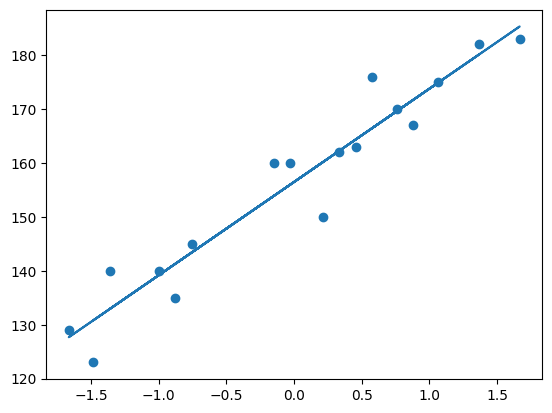

In [51]:
## Plot the best fit line with respect to the training Data
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction of test data

1. Predicted height output = Intercept + Coef_(weights)
2. y_pred_test = 156.470 + 17.29(X_test)

In [53]:
### Prediction for the test data
y_prediction = regression.predict(X_test)

In [54]:
## Performace Metrix
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [55]:
mse = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


**R2_Score**

In [56]:
from sklearn.metrics import r2_score

In [57]:
score = r2_score(y_test,y_prediction)
print(score)

0.7360826717981276


**Adjusted R2_Score**

In [58]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [60]:
import statsmodels.api as sm


In [61]:
model = sm.OLS(y_train,X_train).fit()

In [62]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [63]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 15 Dec 2024   Prob (F-statistic):                       0.664
Time:                        14:03:34   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [64]:
## Prediction for new Data
regression.predict(scaler.transform([[72]]))

c:\Users\Paul\Desktop\Learnings\Machine Learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])